# Trabalho de Análise Exploratória de Dados

Marcos Vinicius da Silva


### Problema gerador Titanic - Criar um modelo preditivo que responda à seguinte pergunta: “Quais tipos de pessoas tinham maior probabilidade de sobreviver?”

Mas, antes disso, o foco é fazer uma análise exploratória dos dados para entendermos melhor as informações e extrair alguns insights da base de treino.

### A base de dados original é a do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Dicionário de Dados

**Variável--------------Definição-----------------------Chave**




survived--------------------Sobrevivência-------------------------0 = Não, 1 = Sim

pclass-----------------------Classe de ingresso-----------------1 = 1º, 2 = 2º, 3 = 3º

name------------------------Nome

sex----------------------------Sexo

Age---------------------------Idade em anos

sibsp------------------------Numero de irmãos/cônjuges a bordo do Titanic

parch------------------------Numero de pais/crianças a bordo do Titanic

ticket------------------------Número do bilhete

fare--------------------------Tarifa de passageiro

cabin------------------------Número da cabine

embarked-----------------Porto de embarque-----------------------C = Cherbourg, Q = Queenstown, S = Southampton





## 1. Carregar e Explorar o Conjunto de Dados

### 1.1. Importar as bibliotecas


In [ ]:
# importando as bibliotecas do pandas e numpy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Carregar o conjunto de dados

In [ ]:
from google.colab import files
uploaded = files.upload()  # Isso abre uma janela para selecionar o arquivo no seu computador

# ler a base de treino.
df = pd.read_csv('train.csv')

Saving train.csv to train (1).csv


### 1.3. Compreender o conjunto de dados e suas variáveis

#### **Entendendo os Tipos de Variáveis**

In [ ]:
# exibir as primeiras 5 linhas do do dataframe. É útil para ver alguns valores de exemplo para cada variável.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# exibir as últimas 5 linhas do do dataframe.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# exibir a quantidade de colunas e linhas
df.shape

(891, 12)

In [ ]:
# exibir o nome de todas as colunas do dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# executando o info() para para exibir um resumo do DataFrame fornecendo informações essenciais sobre os dados, como quantas entradas estão faltando no conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Variáveis Qualitativas (Categóricas): PassengerId, Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked

Variáveis Quantitativas (Númericas): Age, SibSp, Parch, Fare

O conjunto de dados possui 12 variáveis (colunas) e 891 amostras (linhas).

Aqui temos uma observação a ser feita:

Apesar das variáveis PassengerId, Survived e Pclass serem compostas por registros numéricos, na prática elas atuam como variáveis categóricas, pois elas representam identificadores únicos para observações individuais (caso do PassengerId) ou representam categorias (caso de Survived, onde 0 representa os não sobreviventes e 1 os sobreviventes, e Pclass), e não possuem significado quantitativo nem uma ordem lógica que indique uma hierarquia ou medida.

#### **Resumo das variáveis quantitativas**

In [ ]:
# resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas.
df[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


O resumo numérico das variáveis quantitativas nos fornece vários insights:

**Idade (Age):**

A média de idade é 29,7 anos, com a faixa de idade variando de 0,42 (bebês) a 80 anos.
A distribuição com uma mediana de 28 anos sugere um grupo majoritariamente adulto, e o desvio padrão de 14,5 indica uma variação ampla nas idades.
A presença de valores ausentes em 177 registros pode ter influência nas análises e modelos preditivos que dependam dessa variável.

**Número de Irmãos/Cônjuges (SibSp):**
A maioria dos passageiros não estava acompanhada de irmãos ou cônjuges (mediana e primeiro quartil são 0).
O valor máximo de 8 indica a presença de grandes famílias, mas a média de 0,52 revela que isso é uma exceção.

**Número de Pais/Filhos (Parch):**
Similar ao SibSp, a maioria não estava acompanhada de pais ou filhos (mediana e primeiro quartil também 0), com uma média de 0,38.
O máximo de 6 indica a presença de algumas famílias grandes.

**Tarifa (Fare):**
Média de tarifa de 32,2, mas com grande variabilidade (desvio padrão de 49,7), sugerindo uma variação significativa nos preços pagos.
A mediana de 14,45 indica que muitos pagaram tarifas mais baixas, enquanto o máximo de 512,3 revela que alguns passageiros, possivelmente da primeira classe, pagaram preços altos.

#### **Visualização das variáveis quantitativas**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

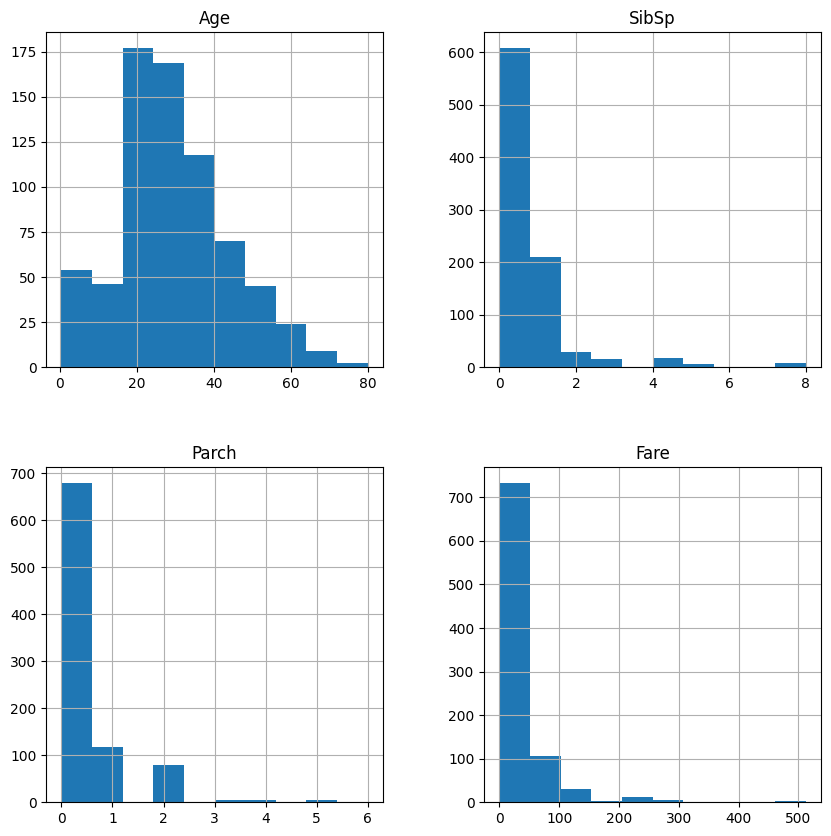

In [ ]:
# histograma das variáveis numéricas
df[['Age', 'SibSp', 'Parch', 'Fare']].hist(figsize=(10,10))

**Algumas conclusões que podemos tirar dos gráficos:**

- Há muitos passageiros entre 20 e 40 anos.

- A maioria das pessoas está viajando sozinha, ou seja, sem parentes ou conjuge.

- A maior parte dos passageiros pagou uma tarifa menor que 50.

## 2. Limpeza de Dados

### 2.1 - Tratamento de valores ausentes e correção de erros

In [ ]:
# verificar a quantidade de valores nulos em cada coluna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


As variáveis Age, Cabin e Embarked possuem dados faltantes. Vamos verificar quanto isso representa do total da nossa amostra:

In [ ]:
((df.isna().sum()/df.shape[0]).sort_values(ascending=False)) *100

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


#### 2.1.1 Analisando os valores ausentes da variável Embarked

In [ ]:
# filtrar as amostras com registro de embarque vazio
df[df.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Pesquisando no Google, encontramos que as duas pessoas que estão com dados faltantes de embarque, embarcaram no Porto de Southampton. Portanto, decidimos adicionar essas informaçãoes na base de dados.

https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html


In [ ]:
# como eram poucas amostras, neste caso apenas duas, decidimos fazer a pesquisa e inlcuir o valor correto na variável Embarked para esses dois registros nulos
df.loc[df.Embarked.isnull(),'Embarked'] = 'S'

In [ ]:
# visualizar as amostras contendo os dados inseridos na variável Embarked
df.iloc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


#### 2.1.2 Analisando os valores ausentes da variável Age

In [ ]:
# verificar os valores nulos da idade
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Será que vale buscar a informação de idade de cada uma das 177 pessoas? Seria um processo muito manual e uma boa quantidade de tempo despendido. Podemos tentar fazer algumas análises e tentar entender qual seria a melhor estratégia:

In [ ]:
# analisar o resumo numérico da variável Age (idade)
df.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: >

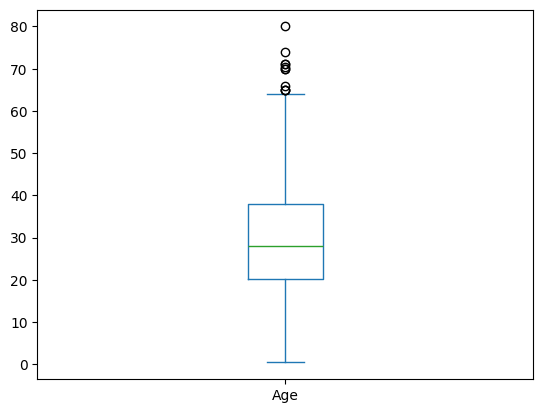

In [ ]:
# gráfico boxplot da variável Age (idade), para visualizar o resumo numérico acima de forma gráfica
df.Age.plot.box()

<Axes: ylabel='Frequency'>

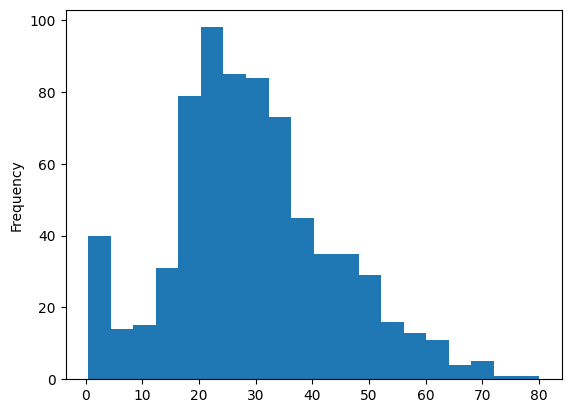

In [ ]:
# gráfico de histograma da variável Age (idade)
df.Age.plot.hist(bins=20)

O histograma nos da uma visão de como está a distribuição da variável Age. Podemos observar que há uma concentração entre 20 e 40 anos.

In [ ]:
# uma opção seria usar a mediana
df.Age.median()

28.0

In [ ]:
# porém, pode ser que essa mediana seja diferente em cada classe
df.groupby('Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [ ]:
# podemos adicionar o gênero também para deixar um pouco mais específica, mas ainda generalizada
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Vamos tratar a variável Age com a informação acima

In [ ]:
# Tratar a variável Age preenchendo os registros vazios com a mediana por classe e sexo; se a variável Age não for vazia, retorne o valor dela mesma.
df['Age'] = df.Age.fillna(df.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [ ]:
# visualizando o novo dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.1.3 Analisando a variável Cabin

In [ ]:
# verificar os valores
df.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Temos um máximo de 4 passageiros por cabine, mas entendemos que essa informação não é de grande valia para resolver o problema, então vamos remover essa coluna

In [ ]:
# remover a variável Cabin
df = df.drop('Cabin', axis=1)

In [ ]:
# verificar a quantidade de valores nulos em cada coluna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### 2.2 - Remoção de variáveis que não consideramos úteis para resolver o problema

Agora, após essa limpeza inicial, vamos verificar a cardinalidade (quantos valores únicos existem em cada coluna) de cada coluna

In [ ]:
# mostrar a cardinalidade (quantos valores únicos existem em cada coluna)
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Podemos observar que a variável PassangerId representa identificadores únicos para observações individuais, então isso não nos ajuda para as análises que faremos e isso é um grande indício que possamos remover essa coluna.

In [ ]:
# remover a variável PassengerId
df = df.drop('PassengerId', axis=1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2.3 - Remoção de duplicatas

In [ ]:
# verificar a existência de duplicatas
df.duplicated().sum()

0

Não existem duplicatas para serem removidas

## 3. Detecção e Tratamento de Outliers

In [ ]:
# resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas.
df[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.112424,0.523008,0.381594,32.204208
std,13.304424,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,21.500000,0.000000,0.000000,7.910400
50%,26.000000,0.000000,0.000000,14.454200
75%,36.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


No resumo numérico acima, a variável Fare se destaca por ter um valor máximo muito distante do 3º quartil (75%). Vamos filtrar esse valor para analisar os registros:

In [ ]:
# filtrar as amostras com o valor máximo para a variável Fare
df[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


Agora vamos usar o boxplot para uma visualização gráfica:

<Axes: >

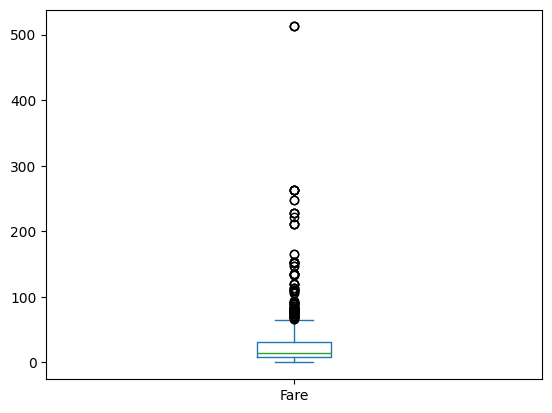

In [ ]:
# gráfico boxplot da variável Fare
df.Fare.plot.box()

De fato, o valor 512.3292 é um outlier, um valor muito distante dos outros, mas isso não significa que é um erro. Podemos tentar pesquisar pelo nome do passageiro no Google e ver se isso é um erro ou não.

https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html

Neste link, podemos ver que realmente foi esse valor que ela pagou. Além disso temos que lembrar que estamos usando uma base de treino, ou seja, uma amostra.

## 4. Correlação de variáveis

Vamos investigar o quão relacionadas estão as nossas variáveis.

Esta etapa é importante porquê se as variáveis tiverem alta correlação, geralmente temos que tratá-las de alguma forma, seja removendo uma delas, combinando as duas em uma só ou outra técnica mais adequada.

Diminuir as variáveis de um modelo é conhecido como redução de dimensionalidade.

In [ ]:
# verificar a correlação linear entre as variáveis quantitativas
df[['Age', 'SibSp', 'Parch', 'Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.249854,1.000000,0.414838,0.159651
Parch,-0.175526,0.414838,1.000000,0.216225
Fare,0.122692,0.159651,0.216225,1.000000


<Axes: >

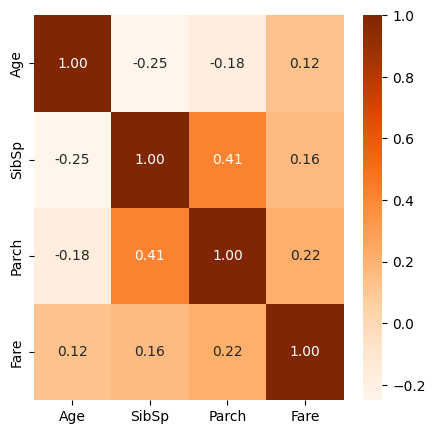

In [ ]:
# mapa de calor para visualizar a possível existência de uma correlação linear forte ( geralmente > 0.8)
plt.figure(figsize=(5,5))
sns.heatmap(df[['Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='Oranges', fmt='.2f')

Pela tabela e pelos gráficos observamos que as variáveis que mais se correlacionam é a SibSp e Parch que são variáveis que tratam de graus de parentesco e tem uma correlação positiva de 0.41.

No entanto tais correlações são fracas, ou seja, elas por si só não são capazes de explicar o desempenho da outra variável.

## 5. Feature Engineering e Visualização

Neste tópico vamos tentar responder algumas perguntas para nos ajudar na resolução do problema que, no futuro, seria a predição de "Quais tipos de pessoas tinham maior probabilidade de sobreviver?"

### 5.1 Quantos sobreviventes?

A ideia aqui é analisar quantas pessoas sobreviveram em nossa base de dados, exibindo essa informação em um gráfico. Para isso, primeiro utilizamos o método value_counts() para contar todos os registros da variável 'Survived', como mostrado abaixo.

In [ ]:
# Conta o número de sobreviventes e não sobreviventes da variável 'Survived'
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Verificar a distribuição percentual dos valores, ou seja, a proporção de pessoas que sobreviveram e não sobreviveram
df.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


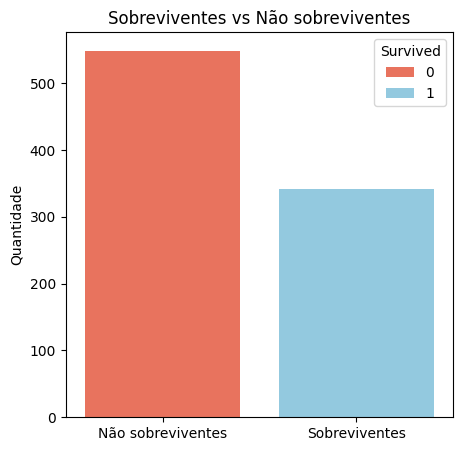

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Cria um gráfico de contagem para a variável 'Survived', usando diferentes cores para sobreviventes e não sobreviventes
sns.countplot(x='Survived', data=df, hue='Survived', palette={0: 'tomato', 1: 'skyblue'})

# Adicionando título e rótulos aos eixos
plt.title('Sobreviventes vs Não sobreviventes')
plt.xlabel('')
plt.ylabel('Quantidade')
# Substitui os valores no eixo x (0 e 1) pelos rótulos 'Não sobreviventes' e 'Sobreviventes'
plt.xticks([0, 1], ['Não sobreviventes', 'Sobreviventes'])

# Exibindo o gráfico
plt.show()

Analisando o gráfico acima, vemos que há uma quantidade maior de não sobreviventes (549) do que de sobreviventes (342).


### 5.2 A probabilidade de sobrevivência depende do gênero?

Vamos analisar agora se sobreviveram mais homens ou mulheres em nossa amostra, criando uma estimativa sobre isso. Primeiro, contamos a quantidade de cada valor na variável 'Sex'. Em seguida, criamos um gráfico de barras empilhadas, comparando a variável 'Sex' com a variável 'Survived', para termos uma noção da nossa amostra, ou seja, quantas pessoas de cada sexo existiam e quantas sobreviveram.

In [ ]:
# Conta o número de homens e mulheres da variável 'Sex'
df.Sex.value_counts()

,count
Sex,
male,577
female,314


In [ ]:
# Calcula a taxa média de sobrevivência (média de 'Survived') para cada grupo de 'Sex'
# (masculino e feminino), permitindo uma comparação entre as taxas de sobrevivência por sexo.
df.groupby('Sex').Survived.mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# Define a função para plotar gráfico de barras empilhadas
def grafico_barras_empilhado(dataset, feature, titulo, stacked = True) :

  # Agrupa o conjunto de dados pelas colunas 'Survived' e pela variável fornecida em 'feature',
  # conta o número de ocorrências em cada grupo e reorganiza os dados em um formato de tabela,
  # substituindo valores ausentes por zero.
  counts = dataset.groupby(['Survived', feature]).size().unstack(fill_value=0)

  # Plota o gráfico de barras a partir dos dados agrupados, com barras empilhadas,
  # e configura o tamanho da figura.
  counts.plot(kind='bar', stacked=stacked, figsize=(5, 5))

  # Adicionando título e rótulos aos eixos
  plt.title(titulo)
  plt.xlabel('')
  plt.ylabel('Quantidade')
  # Substitui os valores no eixo x (0 e 1) pelos rótulos 'Não sobreviventes' e 'Sobreviventes'
  plt.xticks(ticks=[0, 1], labels=['Não Sobreviveu', 'Sobreviveu'], rotation=0)

  # Exibindo o gráfico
  plt.show()

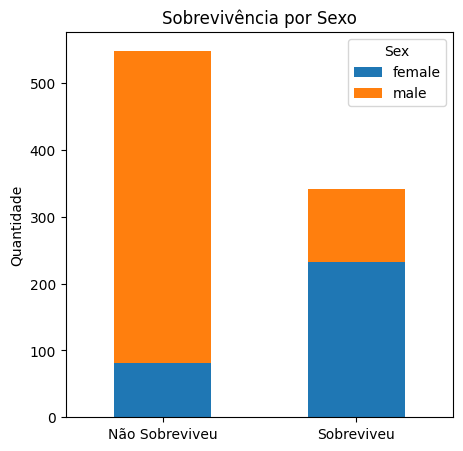

In [ ]:
grafico_barras_empilhado(df, 'Sex', 'Sobrevivência por Sexo')

Analisando o gráfico, vemos que, em nossa amostra, temos mais homens do que mulheres. No entanto, observamos que sobreviveram mais mulheres do que homens. Sendo assim, estima-se que as mulheres foram priorizadas para serem salvas primeiro.

### 5.3. A classe à qual um passageiro pertencia está correlacionada com a probabilidade de sobrevivência?

Nosso objetivo aqui é analisar se a classe à qual um passageiro pertencia está correlacionada com a probabilidade de sobrevivência. Com isso separamos a quantidade de não sobreviventes e sobreviventes por classe e demostramos qual a proporção de sobreviventes por classe.

In [ ]:
# Cria uma tabela dinâmica (pivot table) que conta o número de bilhetes ('Ticket') para cada
# combinação de sobrevivência ('Survived') e classe ('Pclass')
classe_sobreviventes = pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

# Renomeia o índice 'Survived', substituindo 0 por 'Não sobreviventes' e 1 por 'Sobreviventes'
classe_sobreviventes.index=['Não sobreviventes', 'Sobreviventes']

# Renomeia as colunas 'Pclass'
classe_sobreviventes.columns = ['Classe 1', 'Classe 2', 'Classe 3']

# Exibe as informações
print(classe_sobreviventes)

                   Classe 1  Classe 2  Classe 3
Não sobreviventes        80        97       372
Sobreviventes           136        87       119


In [ ]:
# Cria uma tabela dinâmica (pivot table) que conta o número de bilhetes ('Ticket') para cada
# combinação de sobrevivência ('Survived') e classe ('Pclass')
classe_sobreviventes = pd.pivot_table(df, index='Pclass', values='Survived', aggfunc='mean')

# Renomeia o índice 'Classe', substituindo 1 por 'Classe 1',  2 por 'Classe 2' e 3 por 'Classe 3'
classe_sobreviventes.index = ['Classe 1', 'Classe 2', 'Classe 3']

# Renomeia a colunas 'Survived'
classe_sobreviventes.columns = ['% de sobreviventes']

# Exibe as informações em percentual
print(classe_sobreviventes*100)

          % de sobreviventes
Classe 1           62.962963
Classe 2           47.282609
Classe 3           24.236253


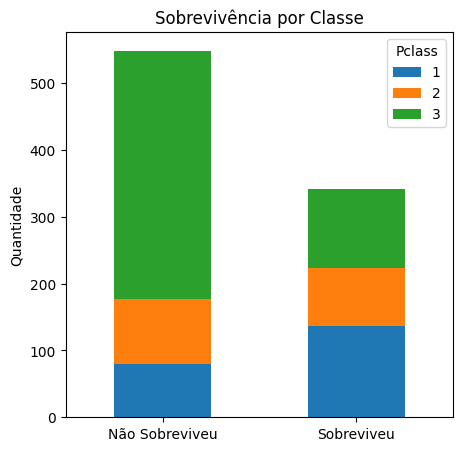

In [ ]:
grafico_barras_empilhado(df, 'Pclass', 'Sobrevivência por Classe')

A partir dos gráficos e tabelas acima, fica claro que a variável Pclass é um uma variável importante a ser considerada, pois apesar de a maioria dos passageiros ter passagens de classe 3, apenas 24% dos passageiros da classe 3 sobreviveram, quase 63% dos passageiros da classe 1 sobreviveram e aproximadamente 47% dos passageiros da classe 2 sobreviveram. Baseado na amostra dos dados estimamos que sobreviveram mais pessoas da classe 1.

### 5.4.  A maior taxa de sobrevivência na Classe 1 se deve à classe em si ou a uma distribuição de gênero distorcida, na qual predominam as passageiras?

Nosso objetivo é analisar em nossa amostra a relação entre as variáveis "Sex", "Survived" e "Pclass" com o intuito de estimar quantas pessoas de cada sexo sobreviveram em cada classe.

In [ ]:
# Cria uma tabela dinâmica (pivot table) que calcula o número total de sobreviventes (soma dos valores de 'Survived') para cada
# combinação de Sexo ('sex') e classe ('Pclass')
classe_sobreviventes = pd.pivot_table(df, index='Sex', columns='Pclass', values='Survived', aggfunc='sum')

# Renomeia o índice 'Sex', substituindo Female por 'Mulher' e Male por 'Homem'
classe_sobreviventes.index = ['Mulher', 'Homem']

# Renomeia as colunas 'Pclass'
classe_sobreviventes.columns = ['Classe 1', 'Classe 2', 'Classe 3']

# Exibe as informações
print(classe_sobreviventes)

        Classe 1  Classe 2  Classe 3
Mulher        91        70        72
Homem         45        17        47


In [ ]:
# Cria uma tabela dinâmica (pivot table) que calcula a taxa média de sobrevivência (média dos valores de 'Survived')
# para cada combinação de sexo ('Sex') e classe ('Pclass')
classe_sobreviventes = pd.pivot_table(df, index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

# Renomeia o índice 'Sex', substituindo Female por 'Mulher' e Male por 'Homem'
classe_sobreviventes.index = ['Mulher', 'Homem']

# Renomeia as colunas 'Pclass'
classe_sobreviventes.columns = ['Classe 1', 'Classe 2', 'Classe 3']

# Exibe as informações em percentual
print(classe_sobreviventes)

        Classe 1  Classe 2  Classe 3
Mulher  0.968085  0.921053  0.500000
Homem   0.368852  0.157407  0.135447


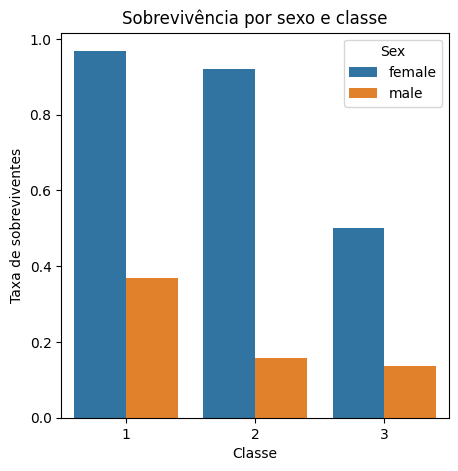

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=[5,5])

# Plota um gráfico de barras mostrando a taxa de sobrevivência para cada classe, diferenciando o resultado por sexo ('Sex') com cores distintas para cada categoria de 'Sex'
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', errorbar=None)

# Adicionando título e rótulos aos eixos
plt.title('Sobrevivência por sexo e classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de sobreviventes')

# Exibindo o gráfico
plt.show()

Ao realizar a análise, estimamos que as mulheres foram privilegiadas em cada classe, sendo que taxa de sobrevivencia estimada de mulheres da classe 3 supera a de homens da classe 1.

### 5.5. A idade do passageiro influenciou a chance de sobrevivência?

Nosso objetivo aqui é analisar se a idade é uma variável que influencia na chance de sobrevivência.

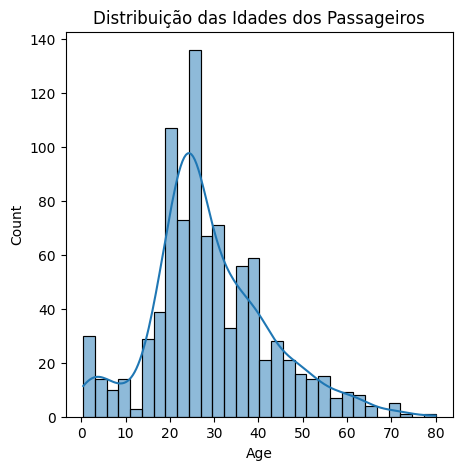

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Gráfico de distribuição com 30 bins
sns.histplot(df['Age'], bins=30, kde=True)

# Adicionando título e rótulos aos eixos
plt.title("Distribuição das Idades dos Passageiros")

# Exibindo o gráfico
plt.show()

O histograma acima mostra que a idade segue uma distribuição razoavelmente normal.

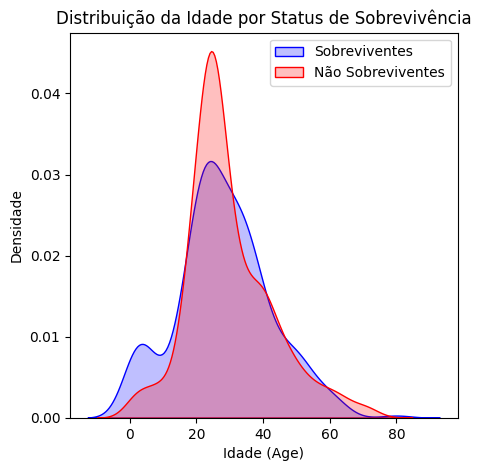

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Plotando o KDE para a variável Age, separando por Survived
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label="Sobreviventes", color="blue")
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label="Não Sobreviventes", color="red")

# Adicionando título e legendas
plt.title("Distribuição da Idade por Status de Sobrevivência")
plt.xlabel("Idade (Age)")
plt.ylabel("Densidade")
plt.legend()

# Exibindo o gráfico
plt.show()

A estimativa da densidade do kernel não fornece informações adicionais, exceto de um aumento de sobreviventes em uma idade muito jovem.

Vamos investigar as variáveis Age e Sex juntos usando um gráfico de enxame, pois não parece plausível que a idade não tenha influência na chance de sobrevivência.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


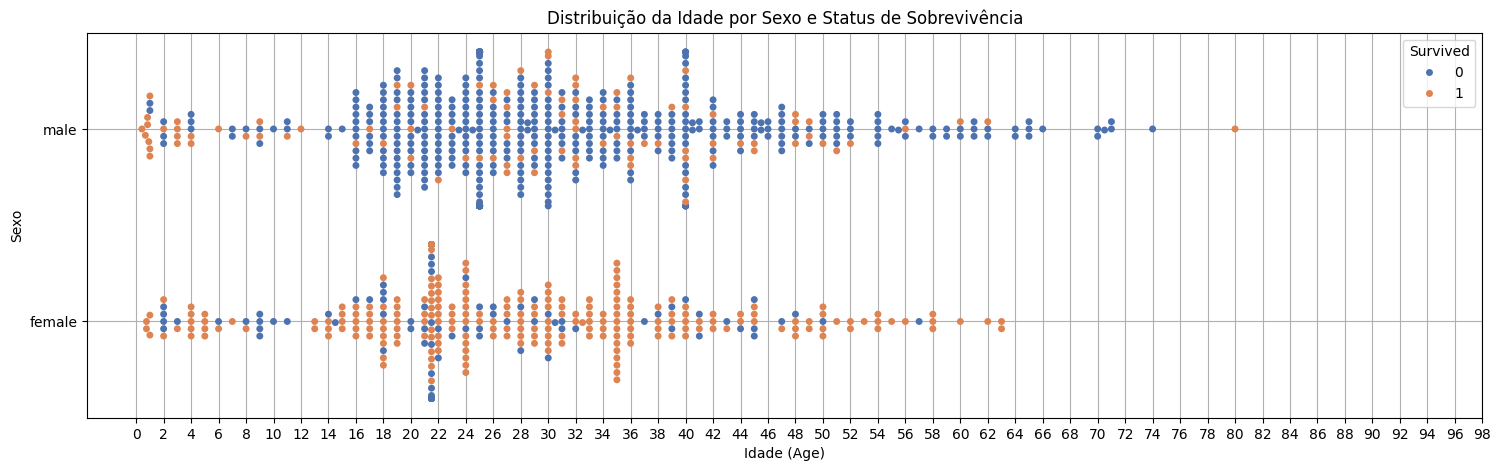

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 5))

# Criando o gráfico swarmplot
sns.swarmplot(x='Age', y='Sex', hue='Survived', data=df, palette="deep")

# Adicionando título
plt.title("Distribuição da Idade por Sexo e Status de Sobrevivência")
plt.xlabel("Idade (Age)")
plt.ylabel("Sexo")

# Ativando a grade
plt.grid(True)

# Definindo os valores do eixo x de 0 a 100 com intervalo de 2
plt.xticks(list(range(0, 100, 2)))

# Exibindo o gráfico
plt.show()

O gráfico de enxame acima mostra que muitos sobreviventes do sexo masculino são passageiros entre 0 e 12 anos de idade. Também é interessante notar que o passageiro mais velho, um homem de 80 anos, sobreviveu.

Vamos investigar também as variáveis Age e Pclass juntos usando um gráfico de enxame.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


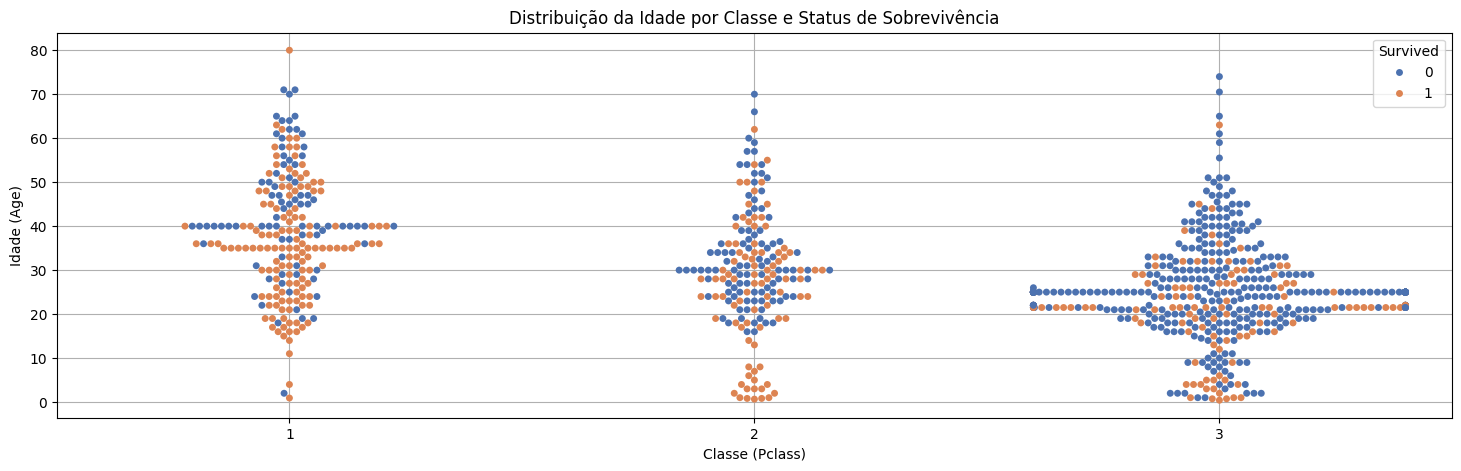

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 5))

# Criando o gráfico swarmplot
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df, palette="deep")

# Adicionando título e rótulos aos eixos
plt.title("Distribuição da Idade por Classe e Status de Sobrevivência")
plt.xlabel("Classe (Pclass)")
plt.ylabel("Idade (Age)")

# Ativando a grade
plt.grid(True)

# Exibindo o gráfico
plt.show()

O gráfico de enxame acima mostra o quão importante é a variável Pclass quando se trata de prever a probabilidade de sobrevivência.

Outra informação interessante do gráfico acima, olhando a distribuição das idades entre 0 e 15, é que a primeira classe não tinha muitos filhos.

### 5.6. O pagamento do preço do tarifa influenciou a chance de sobrevivência?

O objetivo é estimar se o valor pago pelo passageiro influenciou na sua sobrevivencia ou não. Dividimos a análise em 4 categorias ('barato','padrão','caro', 'luxo') para termos uma noção sobre essa estimativa.

In [ ]:
# analisar o resumo numérico da variável Fare (tarifa)
df.Fare.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


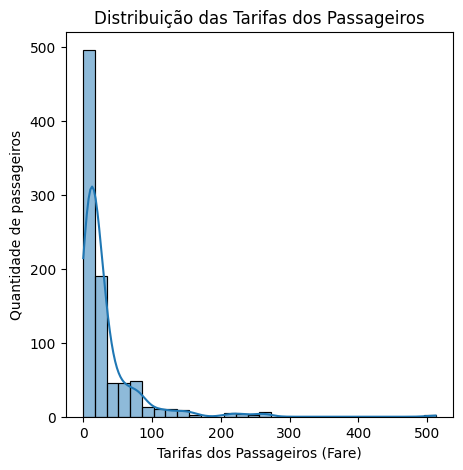

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Gráfico de distribuição com 30 bins
sns.histplot(df['Fare'], bins=30, kde=True)

# Adicionando título e rótulos aos eixos
plt.title("Distribuição das Tarifas dos Passageiros")
plt.xlabel("Tarifas dos Passageiros (Fare)")
plt.ylabel("Quantidade de passageiros")

# Exibindo o gráfico
plt.show()

Podemos ver que a variável tarifa não segue uma distribuição normaçl e tem um pico muito alto na faixa de 0-50.

A distribuição é enviesada para a direita com 75% da tarifa paga abaixo de 31 e uma tarifa máxima paga de 512. Dependendo do modelo que vamos usar, pode fazer sentido normalizar essa variável.

Devido à grande variedade de tarifas, plotar um gráfico de barras não seria interessante para extrair informações úteis. Podemos usar uma técnica de discretização (binning) para categorizar uma variável numérica contínua, ou seja, combinar tarifas em categorias e, então, plotar um gráfico de Sobrevivência por Categoria de Tarifa.

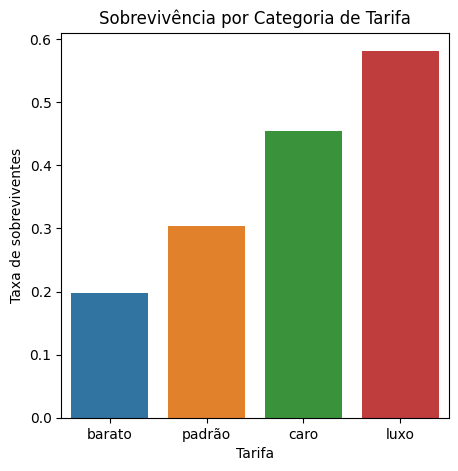

In [ ]:
# como tarifa é uma variável contínua, vamos agrupar as tarifas por categorias

# Classifica as tarifas em quatro categorias (barato, padrão, caro, luxo) com base nos quartis dos valores de 'Fare'
tarifas_por_categoria = pd.qcut(df['Fare'], 4, labels= ['barato','padrão','caro', 'luxo']) #qcut divide os dados em quartis

# Configurando o tamanho da figura
plt.figure(figsize=[5,5])

# Plota um gráfico de barras mostrando a taxa de sobrevivência para cada categoria de tarifa, usando categorias como cores
sns.barplot(data=df, x=tarifas_por_categoria, y='Survived', hue=tarifas_por_categoria, errorbar=None )

# Adicionando título e rótulos aos eixos
plt.title('Sobrevivência por Categoria de Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Taxa de sobreviventes')

# Exibindo o gráfico
plt.show()

Analisando o gráfico observamos que quanto maior foi a tarifa paga, maior foi o número de sobreviventes.

Vamos investigar também a relação entre tarifa, sexo e sobrevivência.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


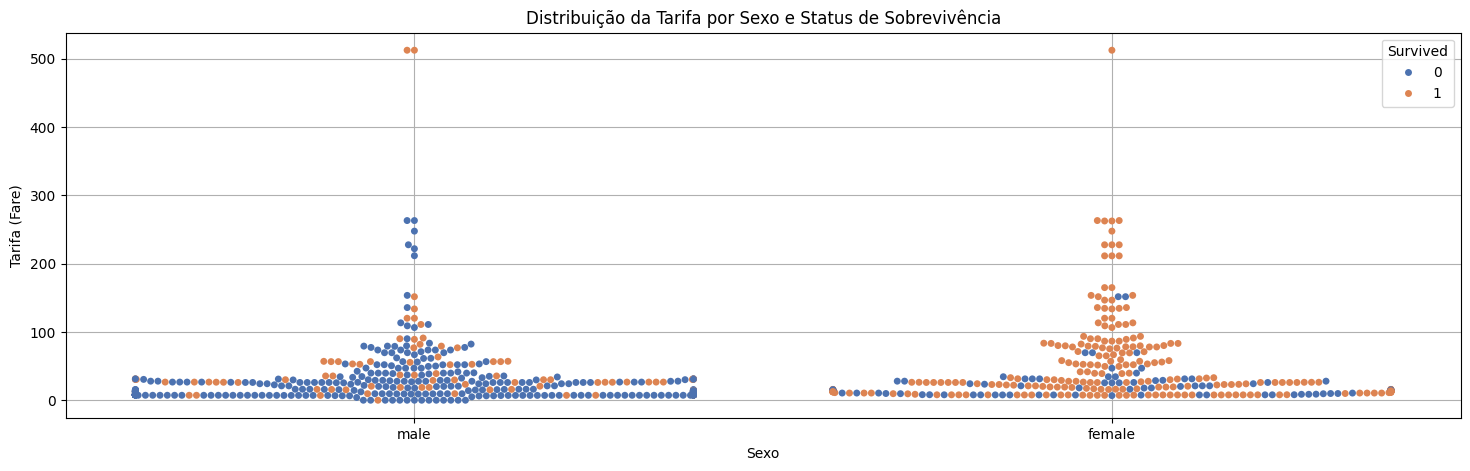

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 5))

# Criando o gráfico swarmplot
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df, palette="deep")

# Adicionando título
plt.title("Distribuição da Tarifa por Sexo e Status de Sobrevivência")
plt.xlabel("Sexo")
plt.ylabel("Tarifa (Fare)")

# Ativando a grade
plt.grid(True)

# Exibindo o gráfico
plt.show()

O gráfico acima mostra que independente do gênero, todos os passageiros com uma tarifa acima de 500 sobreviveram. Além disso, mostra que todos os passageiros do sexo masculino que pagaram entre 200-300 não sobreviveram enquanto os passageiros do sexo feminino sobreviveram.

### 5.7. O número de irmãos/cônjuges ou pais/filhos a bordo influencia a chance de sobrevivência?

o objetivo dessa analise é estimar se os familiares estiveram influência na sobrevivência.

#### Variável SibSp - irmãos/cônjuges

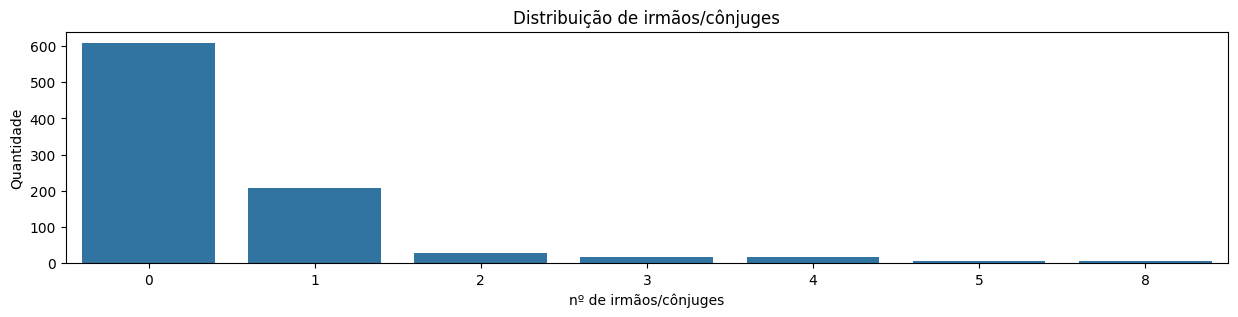

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 3))

# Cria um gráfico de contagem que exibe a distribuição do número de irmãos/cônjuges ('SibSp') a bordo.
# Mostra a quantidade de passageiros para cada valor de 'SibSP', permitindo visualizar quantos passageiros estavam acompanhados de irmãos/cônjuges a bordo.
sns.countplot(x='SibSp', data=df)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de irmãos/cônjuges')
plt.xlabel('nº de irmãos/cônjuges')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

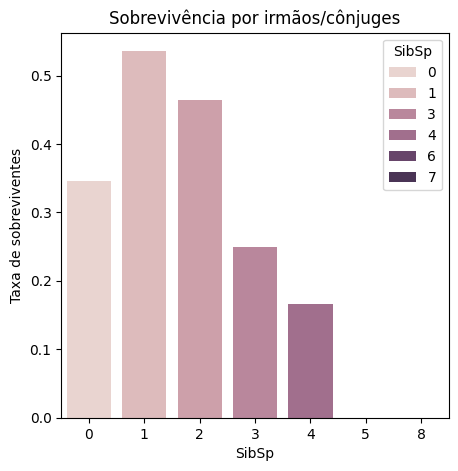

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=[5,5])

# Plota um gráfico de barras mostrando a taxa de sobrevivência ('Survived') em função do número de irmãos/cônjuges a bordo ('SibSp')
sns.barplot(data=df, x='SibSp', y='Survived', hue='SibSp', errorbar=None)

# Adicionando título e rótulos aos eixos
plt.title('Sobrevivência por irmãos/cônjuges')
plt.xlabel('SibSp')
plt.ylabel('Taxa de sobreviventes')

# Exibindo o gráfico
plt.show()

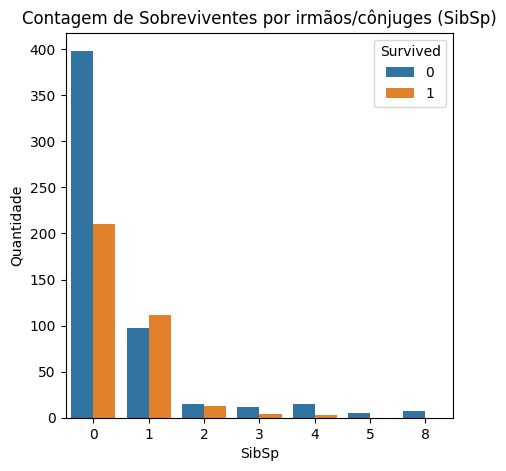

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Cria um gráfico de contagem que mostra a distribuição do número de irmãos/cônjuges a bordo ('SibSp'),
# com as contagens de sobreviventes e não sobreviventes diferenciadas por cores ('hue=Survived').
# O gráfico facilita a comparação da sobrevivência entre passageiros que estavam com diferentes números de irmãos/cônjuges a bordo.
sns.countplot(x='SibSp', hue = 'Survived', data = df)

# Adicionando título e rótulos aos eixos
plt.title('Contagem de Sobreviventes por irmãos/cônjuges (SibSp)')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

Podemos observar nos gráficos acima que a maioria dos passageiros viajou sozinha. Parece que, quanto mais irmãos um passageiro tem, menor a chance de sobrevivência.

#### Variável Parch - pais/filhos

Essa variável contém o número de pais ou filhos com quem cada passageiro estava viajando.

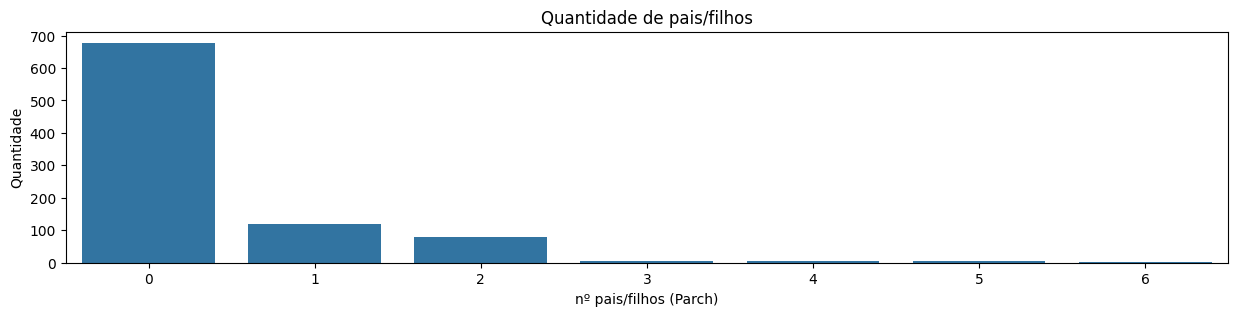

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(15, 3))

# Cria um gráfico de contagem que exibe a distribuição do número de pais/filhos ('Parch') a bordo.
# Mostra a quantidade de passageiros para cada valor de 'Parch', permitindo visualizar quantos passageiros estavam acompanhados de familiares a bordo.
sns.countplot(x='Parch', data=df)

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de pais/filhos')
plt.xlabel('nº pais/filhos (Parch)')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

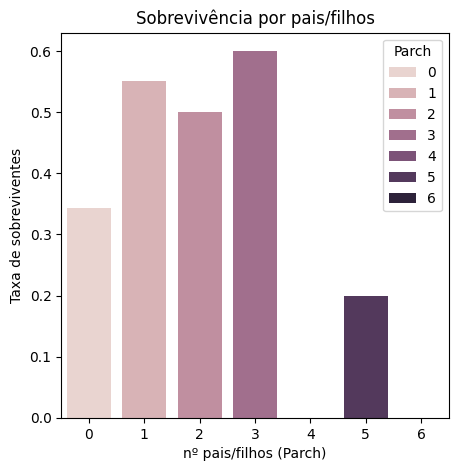

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=[5,5])

# Plota um gráfico de barras mostrando a taxa de sobrevivência ('Survived') em função do número de pais/filhos a bordo ('Parch')
sns.barplot(data=df, x='Parch', y='Survived', hue='Parch', errorbar=None)

# Adicionando título e rótulos aos eixos
plt.title('Sobrevivência por pais/filhos')
plt.xlabel('nº pais/filhos (Parch)')
plt.ylabel('Taxa de sobreviventes')

# Exibindo o gráfico
plt.show()

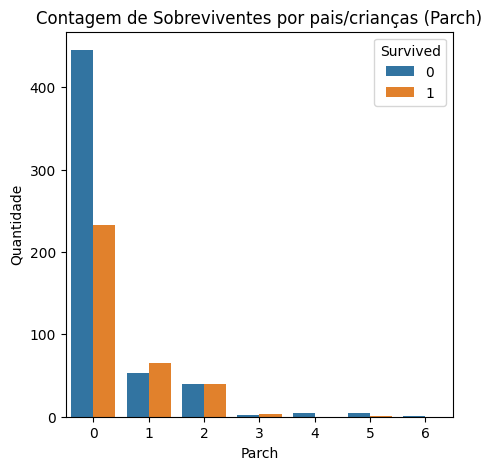

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(5, 5))

# Cria um gráfico de contagem que mostra a distribuição do número de pais/filhos a bordo ('Parch'),
# com as contagens de sobreviventes e não sobreviventes diferenciadas por cores ('hue=Survived').
# O gráfico facilita a comparação da sobrevivência entre passageiros que estavam com diferentes números de pais/filhos a bordo.
sns.countplot(x='Parch', hue = 'Survived', data = df)

# Adicionando título e rótulos aos eixos
plt.title('Contagem de Sobreviventes por pais/crianças (Parch)')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

Observando os gráficos acima, podemos tirar as mesmas conclusões que tiramos para a variável SibSp, ou seja, podemos ver novamente que famílias pequenas tinham mais chances de sobreviver do que famílias maiores e passageiros que viajavam sozinhos.

## 6. Conclusão

Concluindo com algumas estimativas de nossa amostra:

O gênero e a classe foram fatores cruciais para a sobrevivência no naufrágio do Titanic.

Mulheres e passageiros da primeira classe tiveram as maiores taxas de sobrevivência.

A tarifa paga, um possível indicador de classe social, também parece estar relacionada com a chance de sobrevivência.

O passo seguinte seria criar um modelo preditivo que responda a seguinte pergunta: Quais os tipos de pessoas que tinham maior probabilidade de sobreviver?